<a href="https://colab.research.google.com/github/carive47/Finances/blob/main/technical_forecasting/USD_JPY_V0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install matplotlib

In [ ]:
pip install yfinance

     |████████████████████████████████| 63 kB 1.0 MB/s 
     |████████████████████████████████| 6.4 MB 17.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
pip install ta

  Created wheel for ta: filename=ta-0.9.0-py3-none-any.whl size=28908 sha256=96f804732c3f7744bd29a170cbe164f28295205f532ebc6c33d9db5a4654b79e
  Stored in directory: /root/.cache/pip/wheels/72/78/64/cc1c01506a1010a9845e9bd7c69333730f7174661228ea4f98
Successfully built ta


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yfin
import matplotlib.pyplot as plt
import ta


In [ ]:
df = yfin.download('USDJPY=X', start = '2016-01-01', end='2021-01-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,120.288002,120.288002,120.288002,120.288002,120.288002,0
2016-01-04,120.317001,120.447998,118.720001,120.310997,120.310997,0
2016-01-05,119.473999,119.680000,118.801003,119.467003,119.467003,0
2016-01-06,119.099998,119.150002,118.260002,119.101997,119.101997,0
2016-01-07,118.609001,118.752998,117.363998,118.610001,118.610001,0
...,...,...,...,...,...,...
2020-12-28,103.526001,103.893997,103.400002,103.532997,103.532997,0
2020-12-29,103.691002,103.791000,103.466003,103.689003,103.689003,0
2020-12-30,103.552002,103.570000,102.962997,103.558998,103.558998,0


In [ ]:
#EMAS
df['EMA_5'] = ta.trend.ema_indicator(close= df['Close'], window=5, fillna=True)/df['Close']
df['EMA_20']= ta.trend.ema_indicator(close= df['Close'], window=10, fillna=True)/df['Close']
df['EMA_50']= ta.trend.ema_indicator(close=df['Close'], window=50, fillna=True)/df['Close']
df['EMA_100']= ta.trend.ema_indicator(close=df['Close'], window=100, fillna=True)/df['Close']
df.tail()

,Open,High,Low,Close,Adj Close,Volume,EMA_5,EMA_20,EMA_50,EMA_100
Date,,,,,,,,,,
2020-12-28,103.526001,103.893997,103.400002,103.532997,103.532997,0,1.000153,1.000727,1.007047,1.013373
2020-12-29,103.691002,103.791000,103.466003,103.689003,103.689003,0,0.999099,0.999363,1.005315,1.011614
2020-12-30,103.552002,103.570000,102.962997,103.558998,103.558998,0,1.000235,1.000505,1.006319,1.012629
2020-12-31,103.134003,103.278999,103.002998,103.121002,103.121002,0,1.002989,1.003890,1.010178,1.016594
2021-01-01,103.225998,103.250000,103.225998,103.225998,103.225998,0,1.001313,1.002348,1.008791,1.015252


In [ ]:
#INDICADORES
#RSI
df['RSI']= ta.momentum.rsi(close=df['Close'], fillna=True)
#ATR
df['ATR'] = ta.volatility.average_true_range(high=df['High'], low=df['Low'], close=df['Close'], fillna=True)
#Rango de Porcentaje de Williams
df['WR'] = ta.momentum.williams_r(high=df['High'], low=df['Low'], close=df['Close'], fillna=True )

df


,Open,High,Low,Close,Adj Close,Volume,EMA_5,EMA_20,EMA_50,EMA_100,RSI,ATR,WR
Date,,,,,,,,,,,,,
2016-01-01,120.288002,120.288002,120.288002,120.288002,120.288002,0,1.000000,1.000000,1.000000,1.000000,100.000000,0.000000,-50.000000
2016-01-04,120.317001,120.447998,118.720001,120.310997,120.310997,0,0.999873,0.999844,0.999816,0.999813,100.000000,0.000000,-7.928315
2016-01-05,119.473999,119.680000,118.801003,119.467003,119.467003,0,1.004624,1.005651,1.006610,1.006740,2.467508,0.000000,-56.770659
2016-01-06,119.099998,119.150002,118.260002,119.101997,119.101997,0,1.005135,1.007145,1.009315,1.009631,1.696757,0.000000,-61.517513
2016-01-07,118.609001,118.752998,117.363998,118.610001,118.610001,0,1.006203,1.009264,1.012972,1.013545,1.167422,0.000000,-59.597849
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-28,103.526001,103.893997,103.400002,103.532997,103.532997,0,1.000153,1.000727,1.007047,1.013373,42.903383,0.538116,-61.964296
2020-12-29,103.691002,103.791000,103.466003,103.689003,103.689003,0,0.999099,0.999363,1.005315,1.011614,46.077399,0.522893,-52.678235
2020-12-30,103.552002,103.570000,102.962997,103.558998,103.558998,0,1.000235,1.000505,1.006319,1.012629,43.887889,0.537401,-47.802211


In [ ]:
#target

cl = np.array(df['Close'])
target = np.where(cl[1:] > cl[:-1], 1, -1)

df.drop(df.tail(1).index, inplace=True)
df['target']=target

df.drop(df.head(29).index, inplace=True)

print(df.target[df.target==1].count() )
print(sum(df['target']==1))
df


638
638


,Open,High,Low,Close,Adj Close,Volume,EMA_5,EMA_20,EMA_50,EMA_100,RSI,ATR,WR,target
Date,,,,,,,,,,,,,,
2016-02-11,113.238998,113.462997,111.081001,113.251999,113.251999,0,1.019320,1.029919,1.046771,1.052706,26.420380,1.825300,-79.480177,-1
2016-02-12,112.483002,113.123001,111.755997,112.497002,112.497002,0,1.017441,1.030135,1.051687,1.058587,24.527034,1.801778,-86.616256,1
2016-02-15,113.675003,114.546997,113.278000,113.669998,113.669998,0,1.004628,1.015958,1.039232,1.046719,32.607535,1.819508,-75.529334,1
2016-02-16,114.318001,114.867996,113.660004,114.321999,114.321999,0,0.999265,1.008316,1.031999,1.039943,36.666508,1.775829,-69.366760,-1
2016-02-17,114.134003,114.495003,113.389000,114.080002,114.080002,0,1.000923,1.008554,1.032848,1.041314,35.804544,1.727984,-71.654064,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,103.621002,103.654999,103.213997,103.653000,103.653000,0,0.999072,0.999730,1.006168,1.012470,44.786381,0.541510,-54.821277,-1
2020-12-28,103.526001,103.893997,103.400002,103.532997,103.532997,0,1.000153,1.000727,1.007047,1.013373,42.903383,0.538116,-61.964296,1
2020-12-29,103.691002,103.791000,103.466003,103.689003,103.689003,0,0.999099,0.999363,1.005315,1.011614,46.077399,0.522893,-52.678235,-1


In [ ]:
# Funciones
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Medidas de desempeño
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
# Support Vector Machine (SVM) / Support Vector Classification (SVC)
from sklearn.svm import SVC
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Redes Neuronales / Multi-layer Perceptron (MLP)
from sklearn.neural_network import MLPClassifier

In [ ]:
# divisi[on de datos
X = df.drop('target', axis = 1)
Y = df.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=False)
print(X_train.shape)

(891, 13)


In [ ]:
#Standarizacion de datos de entrenamiento
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


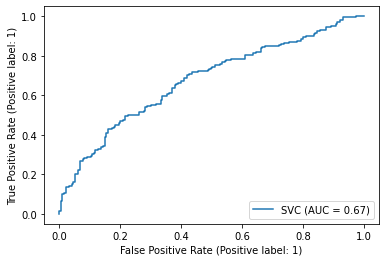

In [ ]:
# Soporte Vectorial
svc = SVC(random_state = 1 )
# entrenar modelo
svc = svc.fit(X_train, Y_train)
# curuva roc
plot_roc_curve(svc, X_test, Y_test)
plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


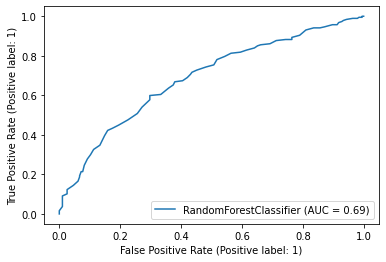

In [ ]:
#random forest

rfc = RandomForestClassifier(random_state=1)
rfc = rfc.fit(X_train, Y_train)
plot_roc_curve(rfc,X_test, Y_test)
plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


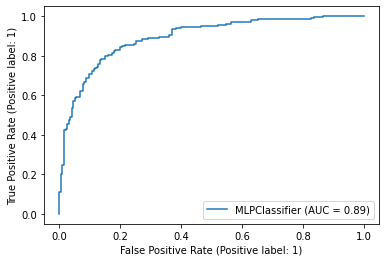

In [ ]:
# redes neuronales
mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(32,16), max_iter=1000, random_state=1 )
mlp = mlp.fit(X_train, Y_train)
plot_roc_curve(mlp, X_test, Y_test)
plt.show()